In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow_hub as hub
import pandas as pd

In [2]:
# for display of images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

### Data Prep

In [3]:
dir_cats = os.path.join('/Users/cats_dogs_images/train/cats')
dir_dogs = os.path.join('/Users/cats_dogs_images/train/dogs')

In [4]:
img_nms_dogs = [dir_dogs+i for i in os.listdir(dir_dogs) if ".jpg" in i]
img_nms_cats = [dir_cats+i for i in os.listdir(dir_cats) if ".jpg" in i]

In [5]:
train = img_nms_dogs[0:800] + img_nms_cats[0:800]
validation = img_nms_dogs[800:] + img_nms_cats[800:]

In [6]:
# Randomly shuffle training and testing
# Model will used shuffle batching but useful check
total_train = np.random.shuffle(train)
total_val = np.random.shuffle(validation)

In [7]:
# getting data

train_dir = os.path.join('/Users/cats_dogs_images/train')
validation_dir = os.path.join('/Users/cats_dogs_images/validation')

train_cats = os.path.join(train_dir, 'cats')
train_dogs = os.path.join(train_dir, 'dogs')
validation_cats = os.path.join(validation_dir, 'cats')
validation_dogs = os.path.join(validation_dir, 'dogs')

num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))
num_cats_val = len(os.listdir(validation_cats))
num_dogs_val = len(os.listdir(validation_dogs))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val


In [8]:
BATCH_SIZE = 32
IMG_SHAPE = 64 # square image

### Train / Validation Split

In [9]:
#Image pre-processing; ImageDataGenerator will incrementall process images and feed them to the model to avoid out of memory errors
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )
# Create generators to pass to model
validation_image_generator = ImageDataGenerator(
    rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


### Model 1

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') 
    
    ])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


EPOCHS = 20

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________

In [11]:
# analysis

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

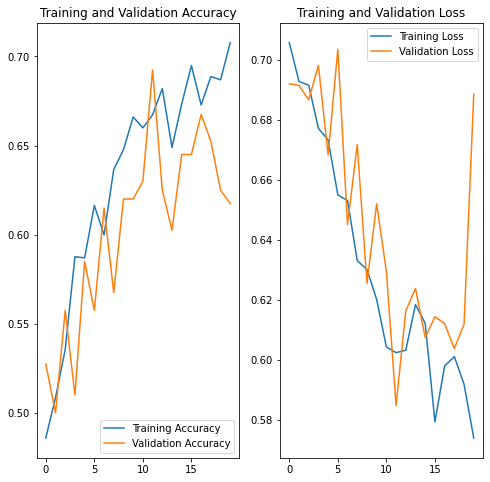

In [12]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
BATCH_SIZE = 32
IMG_SHAPE = 64 # square image

Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


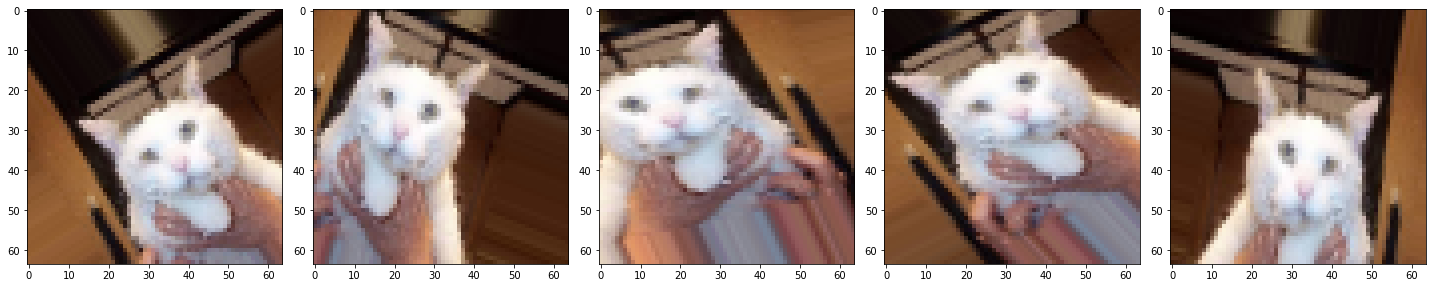

In [14]:
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

validation_image_generator = ImageDataGenerator(
    rescale=1./255)


train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')
images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)

### Model 2

In [15]:
# model

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5), 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    
    tf.keras.layers.Dense(2, activation='softmax') 
    
    ])

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

EPOCHS = 50

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 29, 29, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 128)       73856     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 128)        

In [17]:
# analysis
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)


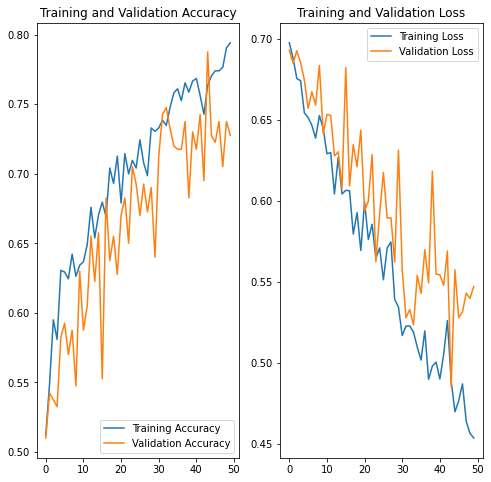

In [18]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [19]:
BATCH_SIZE = 5
IMG_SHAPE = 224 # match image dimension to mobile net input


#generators

#prevent memorization
train_image_generator = ImageDataGenerator(
    rescale=1./255
    )

validation_image_generator = ImageDataGenerator(
    rescale=1./255)


In [20]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=validation_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')


Found 1600 images belonging to 2 classes.
Found 400 images belonging to 2 classes.


In [21]:
# model

# getting MobileNet
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobile_net = hub.KerasLayer(URL, input_shape=(IMG_SHAPE, IMG_SHAPE, 3))

mobile_net.trainable = False




### Model 3

In [22]:
model = tf.keras.models.Sequential([
    mobile_net,
    tf.keras.layers.Dense(2, activation='softmax')
    ])

In [23]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 2562      
Total params: 2,260,546
Trainable params: 2,562
Non-trainable params: 2,257,984
_________________________________________________________________


In [24]:
EPOCHS = 5

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
    )


Epoch 1/5
321/321 [==============================] - 41s 127ms/step - loss: 0.1121 - acc: 0.9589 - val_loss: 0.0641 - val_acc: 0.9753
Epoch 2/5
321/321 [==============================] - 54s 167ms/step - loss: 0.0358 - acc: 0.9888 - val_loss: 0.0439 - val_acc: 0.9901
Epoch 3/5
321/321 [==============================] - 38s 118ms/step - loss: 0.0205 - acc: 0.9938 - val_loss: 0.0493 - val_acc: 0.9802
Epoch 4/5
321/321 [==============================] - 36s 112ms/step - loss: 0.0138 - acc: 0.9988 - val_loss: 0.0449 - val_acc: 0.9802
Epoch 5/5
321/321 [==============================] - 36s 112ms/step - loss: 0.0085 - acc: 0.9988 - val_loss: 0.0445 - val_acc: 0.9778


In [25]:
# analysis

acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

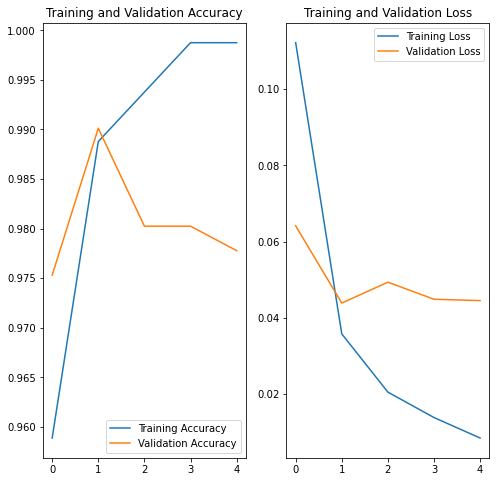

In [26]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Summary

In [27]:


nn_summary_df = pd.DataFrame(
    {
        "Optimizer": ["RMSProp", "Adam", "Adam"],
        "ConvolutionalLayers": [3, 4, 14],
        "PoolingLayers": [4, 4, 1],
        "DenseLayers": [2, 2, 1],
        "Epochs": [20,50,5],
        "TrainingAccuracy": [0.708, 0.794, 0.999],
        "ValidationAccuracy": [0.618, 0.728, 0.978],
    },
    index=["Model 1", "Model 2", "Model 3"]
)

nn_summary_df

,Optimizer,ConvolutionalLayers,PoolingLayers,DenseLayers,Epochs,TrainingAccuracy,ValidationAccuracy
Model 1,RMSProp,3,4,2,20,0.708,0.618
Model 2,Adam,4,4,2,50,0.794,0.728
Model 3,Adam,14,1,1,5,0.999,0.978
